In [1]:
# Screen Time vs Studying Hours - Full Analysis with Hypothesis Testing

# --- 1. Imports ---
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')


In [2]:
# --- 2. Data Loading ---
file_path = "/content/dataset.csv"

df = pd.read_csv(file_path)
df.columns = df.columns.str.strip()

df['Date'] = pd.to_datetime(df['Date'])
df['Total Screen Time (hours)'] = df['Screen time (educational)'] + df['Screen time (non-educational)']

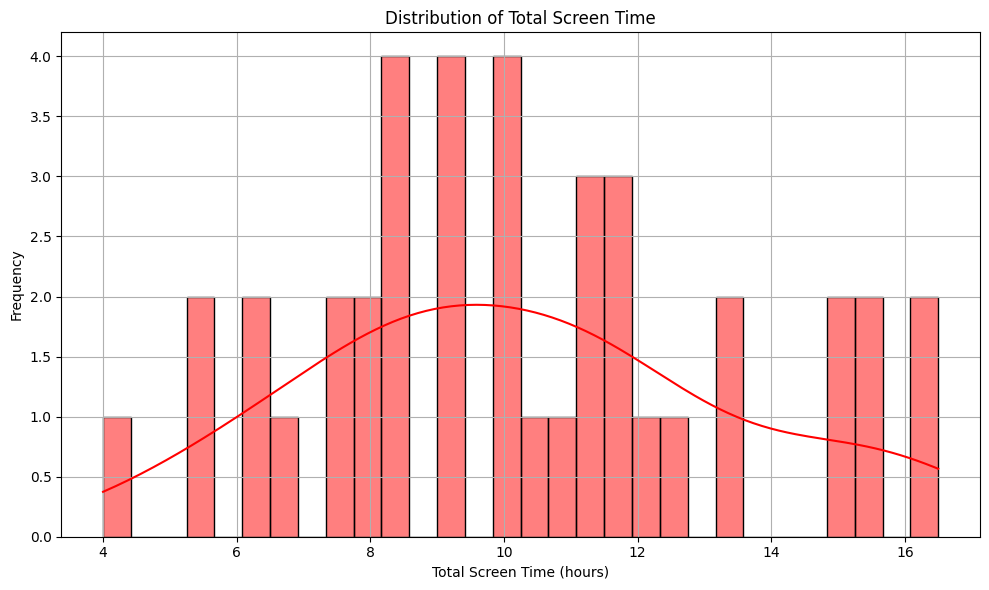

In [3]:
# --- 3. Univariate Analysis ---
## Histogram of Total Screen Time
plt.figure(figsize=(10, 6))
sns.histplot(df['Total Screen Time (hours)'], bins=30, kde=True, color='red')
plt.title('Distribution of Total Screen Time')
plt.xlabel('Total Screen Time (hours)')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

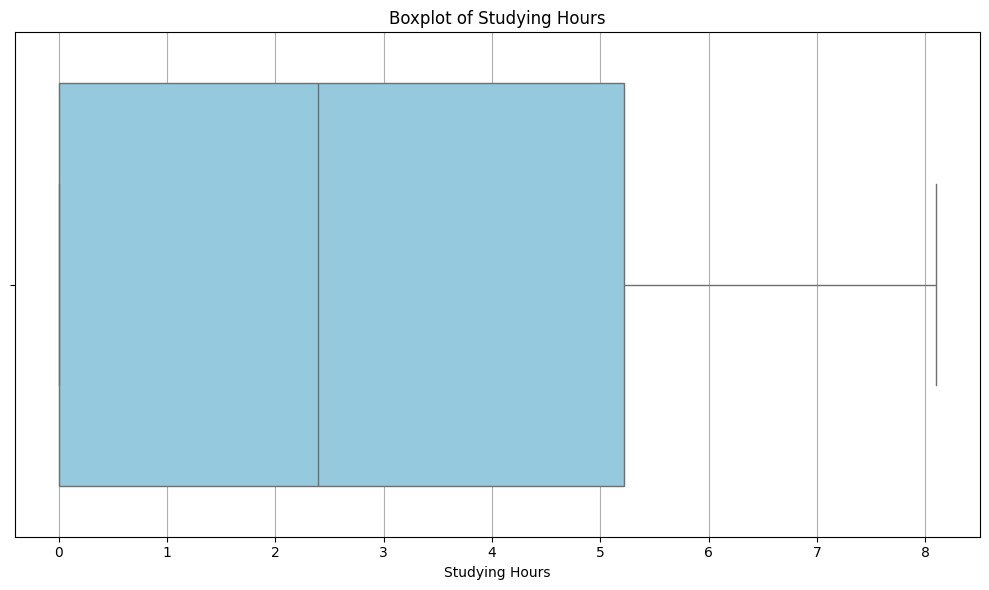

In [4]:
## Boxplot of Studying Hours
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Studying hours'], color='skyblue')
plt.title('Boxplot of Studying Hours')
plt.xlabel('Studying Hours')
plt.grid(axis='x')
plt.tight_layout()
plt.show()


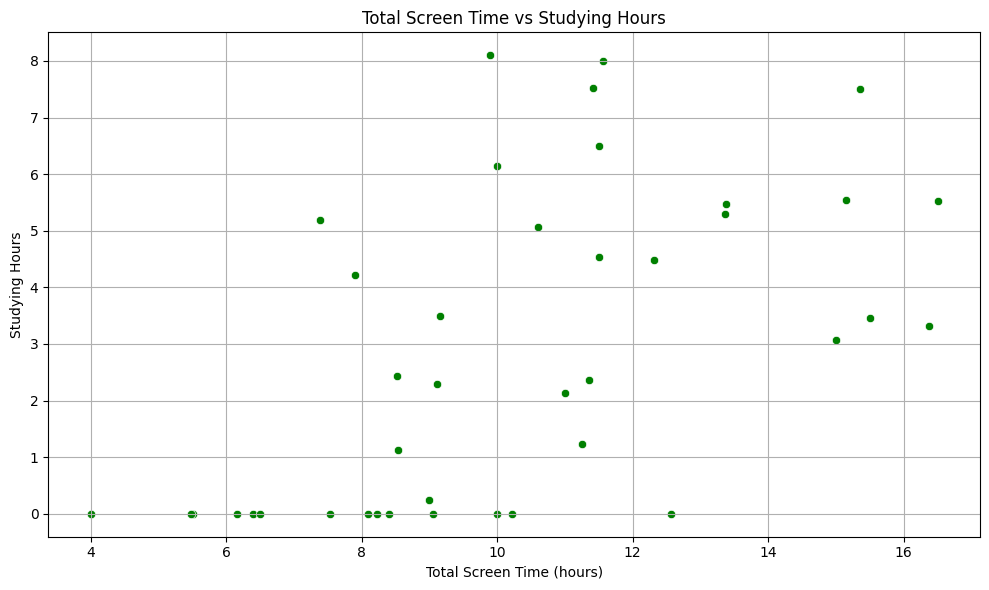

In [5]:
# --- 4. Bivariate Analysis ---
## Scatterplot: Total Screen Time vs Studying Hours
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Total Screen Time (hours)', y='Studying hours', data=df, color='green')
plt.title('Total Screen Time vs Studying Hours')
plt.xlabel('Total Screen Time (hours)')
plt.ylabel('Studying Hours')
plt.grid(True)
plt.tight_layout()
plt.show()


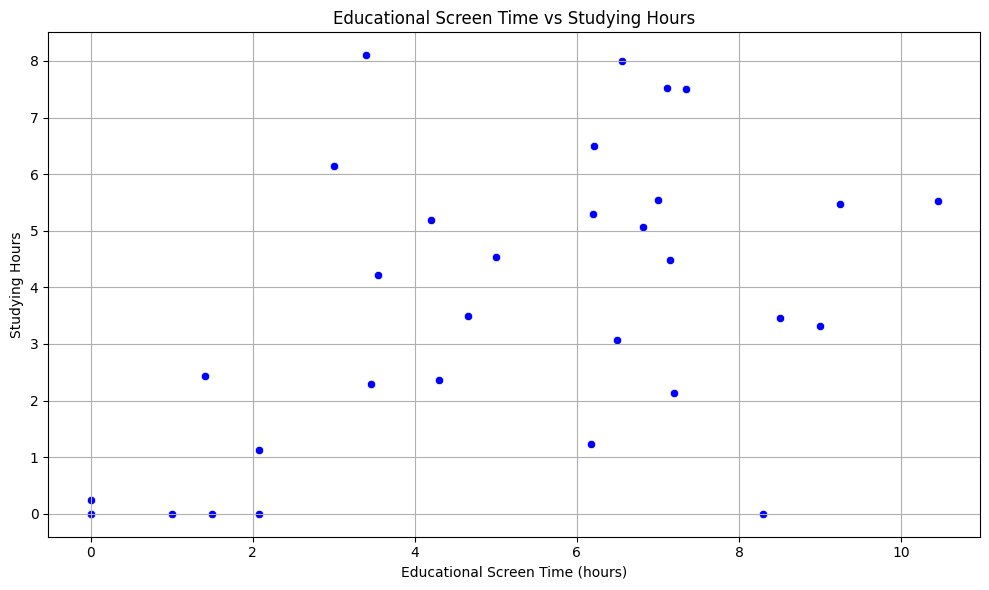

In [6]:
## Scatterplot: Educational Screen Time vs Studying Hours
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Screen time (educational)', y='Studying hours', data=df, color='blue')
plt.title('Educational Screen Time vs Studying Hours')
plt.xlabel('Educational Screen Time (hours)')
plt.ylabel('Studying Hours')
plt.grid(True)
plt.tight_layout()
plt.show()


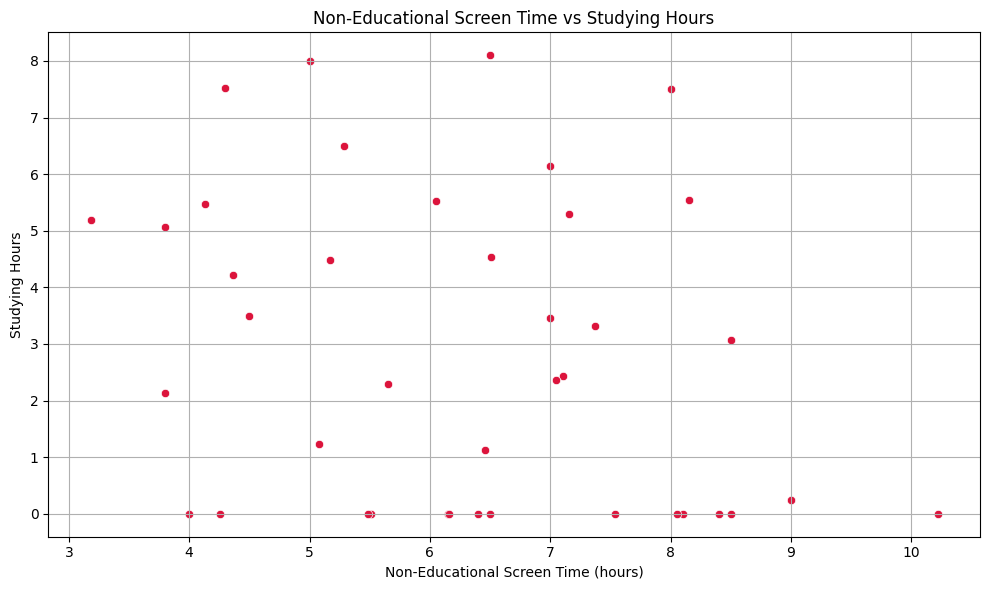

In [7]:
## Scatterplot: Non-Educational Screen Time vs Studying Hours
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Screen time (non-educational)', y='Studying hours', data=df, color='crimson')
plt.title('Non-Educational Screen Time vs Studying Hours')
plt.xlabel('Non-Educational Screen Time (hours)')
plt.ylabel('Studying Hours')
plt.grid(True)
plt.tight_layout()
plt.show()


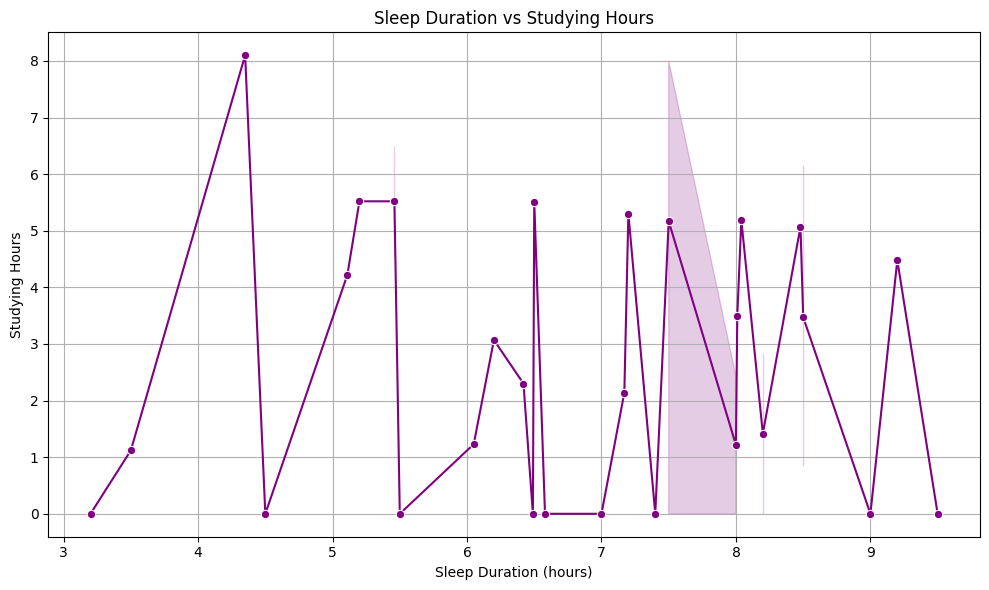

In [8]:
# --- 5. Additional Bivariate Analyses ---
## Sleep Duration vs Studying Hours
plt.figure(figsize=(10, 6))
sns.lineplot(x='Sleep duration', y='Studying hours', data=df, marker='o', color='purple')
plt.title('Sleep Duration vs Studying Hours')
plt.xlabel('Sleep Duration (hours)')
plt.ylabel('Studying Hours')
plt.grid(True)
plt.tight_layout()
plt.show()

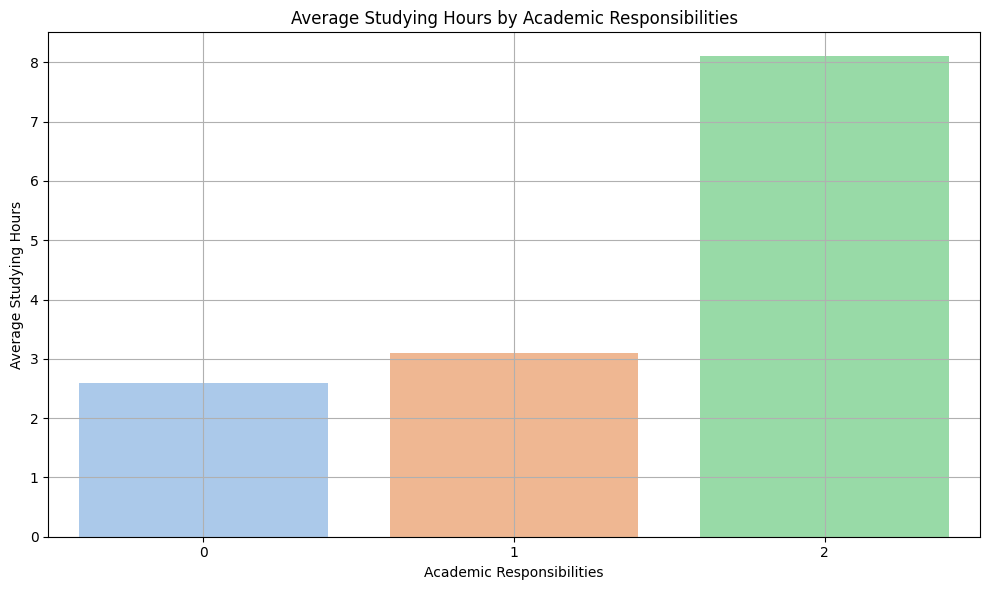

In [9]:
## Barplot: Avg. Study Hours by Academic Responsibilities
plt.figure(figsize=(10, 6))
avg_study = df.groupby('Academic responsibilities')['Studying hours'].mean().reset_index()
sns.barplot(x='Academic responsibilities', y='Studying hours', data=avg_study, palette='pastel')
plt.title('Average Studying Hours by Academic Responsibilities')
plt.xlabel('Academic Responsibilities')
plt.ylabel('Average Studying Hours')
plt.grid(True)
plt.tight_layout()
plt.show()

In [10]:
# --- 6. Boxplot + T-test Based on Screen Time Level ---
## Create Screen Time Groups
median_screen_time = df['Total Screen Time (hours)'].median()
df['ScreenTimeGroup'] = ['High' if x > median_screen_time else 'Low' for x in df['Total Screen Time (hours)']]


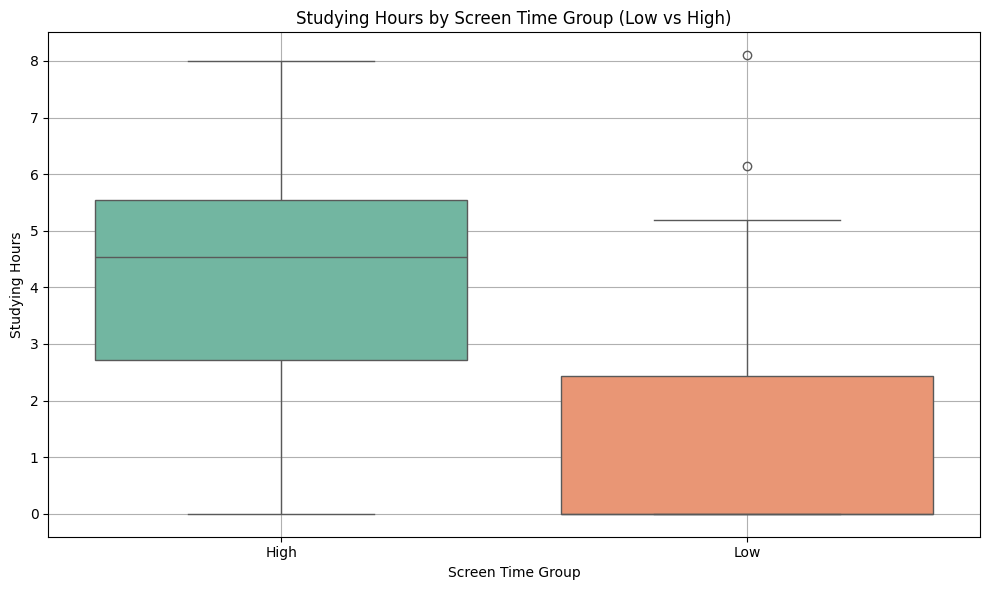

In [11]:
## Boxplot: Studying Hours by Screen Time Group
plt.figure(figsize=(10, 6))
sns.boxplot(x='ScreenTimeGroup', y='Studying hours', data=df, palette='Set2')
plt.title('Studying Hours by Screen Time Group (Low vs High)')
plt.xlabel('Screen Time Group')
plt.ylabel('Studying Hours')
plt.grid(True)
plt.tight_layout()
plt.show()

In [12]:
## T-Test
low_group = df[df['ScreenTimeGroup'] == 'Low']['Studying hours']
high_group = df[df['ScreenTimeGroup'] == 'High']['Studying hours']
t_stat, p_val = stats.ttest_ind(low_group, high_group)
print(f"T-Test Results:\n - t-statistic: {t_stat:.3f}\n - p-value: {p_val:.4f}")


T-Test Results:
 - t-statistic: -3.492
 - p-value: 0.0012


In [13]:
# --- 7. Correlation Analysis (Pearson) ---
## Pearson Correlation between Total Screen Time and Studying Hours
r_val, p_corr = stats.pearsonr(df['Total Screen Time (hours)'], df['Studying hours'])
print(f"\nPearson Correlation:\n - r: {r_val:.3f}\n - p-value: {p_corr:.4f}")


Pearson Correlation:
 - r: 0.566
 - p-value: 0.0001


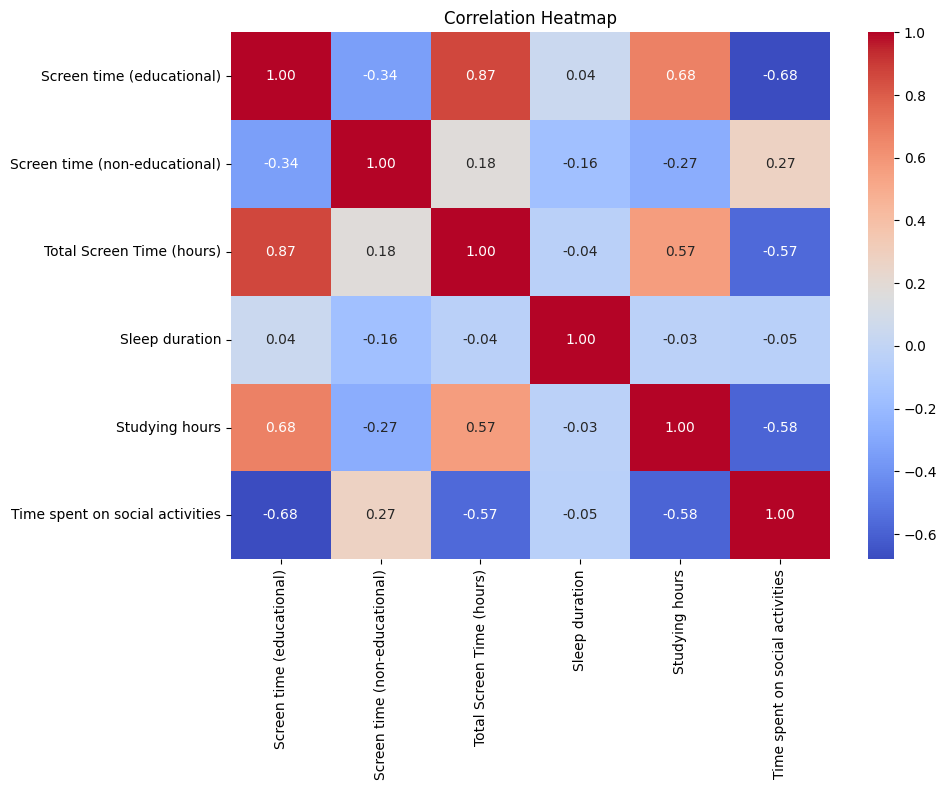

In [14]:
# --- 8. Multivariate Analysis - Heatmap ---
selected_cols = ['Screen time (educational)', 'Screen time (non-educational)', 'Total Screen Time (hours)',
                 'Sleep duration', 'Studying hours', 'Time spent on social activities']
plt.figure(figsize=(10, 8))
sns.heatmap(df[selected_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

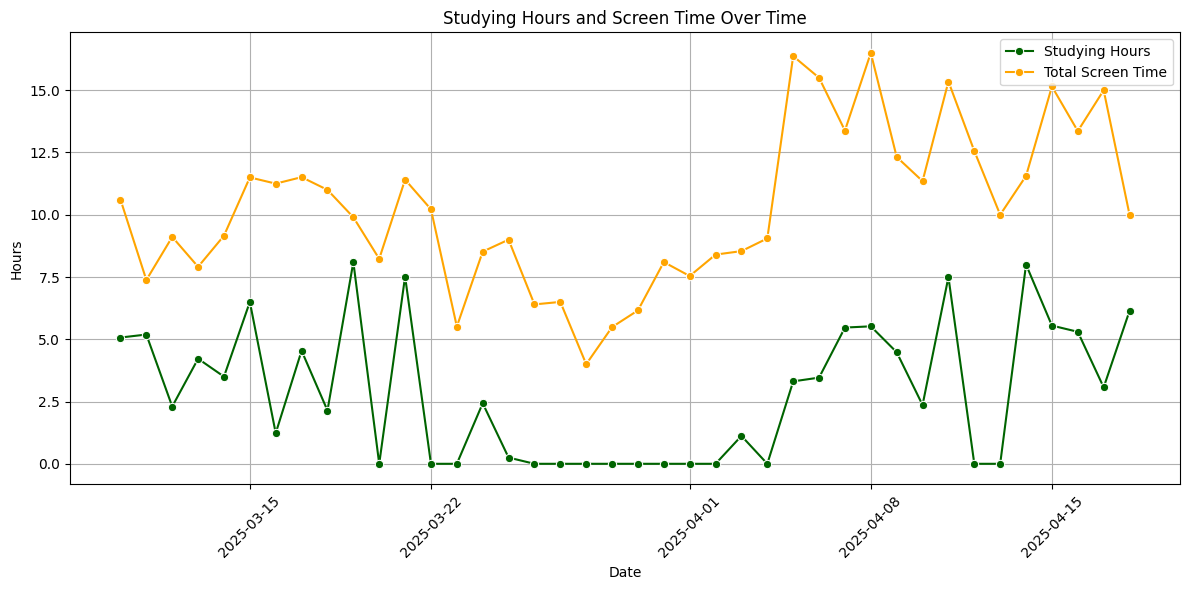

In [15]:
# --- 9. Time Series Plots ---
## Studying Hours and Screen Time Over Time
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Studying hours', data=df, marker='o', label='Studying Hours', color='darkgreen')
sns.lineplot(x='Date', y='Total Screen Time (hours)', data=df, marker='o', label='Total Screen Time', color='orange')
plt.title('Studying Hours and Screen Time Over Time')
plt.xlabel('Date')
plt.ylabel('Hours')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [25]:
# --- Data Cleaning: Remove rows with NaN ---
df.columns = df.columns.str.strip()
df_clean = df.dropna()

In [30]:
# --- 10.1. Import Libraries for Machine Learning ---
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

In [32]:
# --- 10.2. Clean Data and Select Features ---


df = pd.read_csv("dataset.csv")
df.columns = df.columns.str.strip()

df.dropna(inplace=True)
X = df.drop(columns=["Studying hours", "Date"])
y = df["Studying hours"]


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [33]:
# --- 10.3. Hyperparameter Tuning for Random Forest ---

param_grid = {
    "n_estimators": [100],
    "max_depth": [5, 10],
    "min_samples_split": [2],
    "min_samples_leaf": [1]
}

rf = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(
    rf,
    param_grid,
    cv=3,
    scoring="r2",
    n_jobs=-1,
    verbose=2,
    error_score='raise'
)

grid_search.fit(X_train, y_train)

# En iyi modeli ve parametreleri sakla
best_rf = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

Fitting 3 folds for each of 2 candidates, totalling 6 fits
Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [34]:
# --- 10.4. Evaluate Tuned Random Forest Model ---

y_pred = best_rf.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Squared Error (MSE): 0.95
R² Score: 0.76


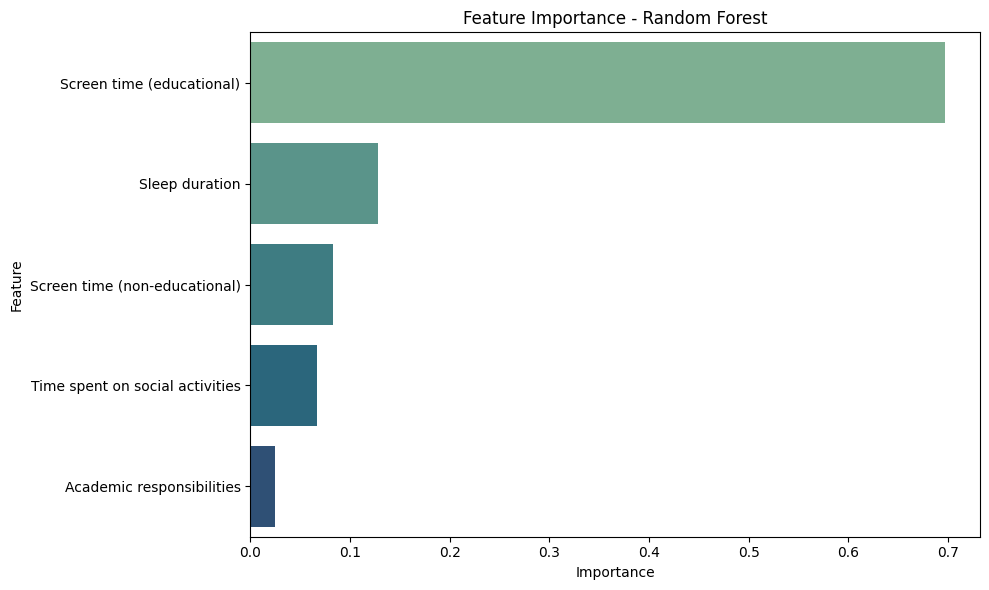

In [35]:
# --- 10.5. Feature Importance Plot ---

importances = best_rf.feature_importances_
features = X.columns

feat_df = pd.DataFrame({
    "Feature": features,
    "Importance": importances
}).sort_values("Importance", ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=feat_df, x="Importance", y="Feature", palette="crest")
plt.title("Feature Importance - Random Forest")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

In [36]:
# --- 10.6. Hyperparameter Tuning for Decision Tree Regressor ---

from sklearn.tree import DecisionTreeRegressor

param_grid_dt = {
    "max_depth": [3, 5, 10],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2]
}

dt = DecisionTreeRegressor(random_state=42)
grid_search_dt = GridSearchCV(
    dt, param_grid_dt,
    cv=3, scoring="r2",
    n_jobs=-1, verbose=2,
    error_score='raise'
)

grid_search_dt.fit(X_train, y_train)
best_dt = grid_search_dt.best_estimator_
print("Best Parameters (Decision Tree):", grid_search_dt.best_params_)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Best Parameters (Decision Tree): {'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2}


In [37]:
# --- 10.7. Hyperparameter Tuning for K-Nearest Neighbors Regressor ---

from sklearn.neighbors import KNeighborsRegressor

param_grid_knn = {
    "n_neighbors": [3, 5, 7, 9],
    "weights": ["uniform", "distance"]
}

knn = KNeighborsRegressor()
grid_search_knn = GridSearchCV(
    knn, param_grid_knn,
    cv=3, scoring="r2",
    n_jobs=-1, verbose=2,
    error_score='raise'
)

grid_search_knn.fit(X_train, y_train)
best_knn = grid_search_knn.best_estimator_
print("Best Parameters (KNN):", grid_search_knn.best_params_)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best Parameters (KNN): {'n_neighbors': 7, 'weights': 'uniform'}


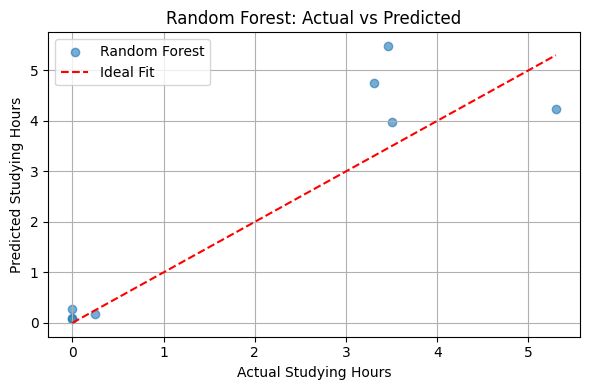

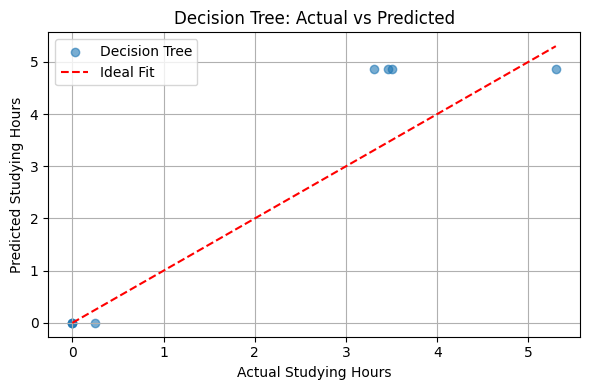

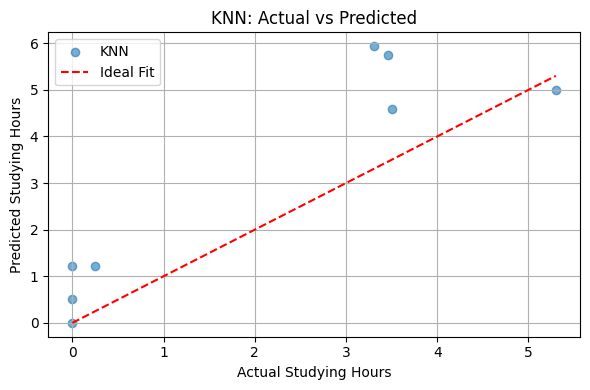

In [38]:
# --- 10.8. Compare Model Performances ---

models = {
    "Random Forest": best_rf,
    "Decision Tree": best_dt,
    "KNN": best_knn
}

results = {}

for name, model in models.items():
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {"MSE": mse, "R²": r2}

    # Grafik: Actual vs Predicted
    plt.figure(figsize=(6, 4))
    plt.scatter(y_test, y_pred, alpha=0.6, label=name)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
             color='red', linestyle='--', label="Ideal Fit")
    plt.xlabel("Actual Studying Hours")
    plt.ylabel("Predicted Studying Hours")
    plt.title(f"{name}: Actual vs Predicted")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [39]:
# --- 10.9. Tabular Summary of Model Performance ---

results_df = pd.DataFrame(results).T.reset_index()
results_df.columns = ["Model", "Mean Squared Error", "R² Score"]
display(results_df)

,Model,Mean Squared Error,R² Score
0,Random Forest,0.950511,0.762715
1,Decision Tree,0.802738,0.799605
2,KNN,2.012113,0.497696
